# Data Load

In [194]:
#gapminder dataset 라이브러리를 설치합니다.

!pip3 install gapminder

Defaulting to user installation because normal site-packages is not writeable


In [195]:
#gapminder를 import하고 출력합니다.

from gapminder import gapminder

gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


# Regression

**주어진 데이터를 활용하여 대륙명, 연도, 기대수명, 인구가 주어졌을 때 1인당 GDP를 예측하는 모델을 만드려고 한다.**

1. 주어진 빈칸에 알맞은 값을 입력하여 country 열을 뺀 새로운 데이터를 gapminder 변수에 할당 하시오.
아래와 같이 gapminder 데이터가 출력될 수 있게 하시오. (10점)

In [196]:
gapminder = gapminder.iloc[:,1:]

In [197]:
gapminder

,continent,year,lifeExp,pop,gdpPercap
0,Asia,1952,28.801,8425333,779.445314
1,Asia,1957,30.332,9240934,820.853030
2,Asia,1962,31.997,10267083,853.100710
3,Asia,1967,34.020,11537966,836.197138
4,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...
1699,Africa,1987,62.351,9216418,706.157306
1700,Africa,1992,60.377,10704340,693.420786
1701,Africa,1997,46.809,11404948,792.449960
1702,Africa,2002,39.989,11926563,672.038623


2. 주어진 빈칸에 알맞은 값을 입력하여 continent 열을 one-hot encoding한 데이터를 encoded_data 변수에 할당하시오. 아래와 같이 encoded_data가 출력될 수 있게 하시오. (10점)

In [198]:
import pandas as pd

encoded_data = pd.get_dummies(gapminder, columns=['continent'],dtype=int)

In [199]:
encoded_data

,year,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,0,0,1,0,0
1,1957,30.332,9240934,820.853030,0,0,1,0,0
2,1962,31.997,10267083,853.100710,0,0,1,0,0
3,1967,34.020,11537966,836.197138,0,0,1,0,0
4,1972,36.088,13079460,739.981106,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,9216418,706.157306,1,0,0,0,0
1700,1992,60.377,10704340,693.420786,1,0,0,0,0
1701,1997,46.809,11404948,792.449960,1,0,0,0,0
1702,2002,39.989,11926563,672.038623,1,0,0,0,0


3. 알맞은 코드를 입력하여 아래와 같이 2x2 subplot에 year, lifeExp, pop, gdpPercap에 대한 히스토그램을 그려서 출력하시오. (20점)

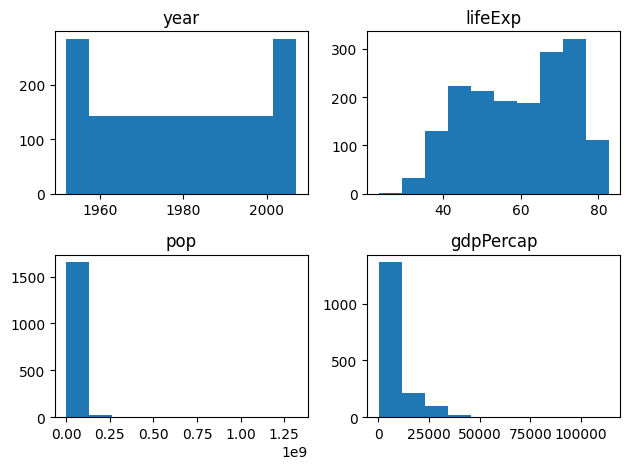

In [200]:
import matplotlib.pyplot as plt

###
plt.subplot(2,2,1)
plt.hist(encoded_data['year'])
plt.title('year')

plt.subplot(2,2,2)
plt.hist(encoded_data['lifeExp'])
plt.title('lifeExp')

plt.subplot(2,2,3)
plt.hist(encoded_data['pop'])
plt.title('pop')

plt.subplot(2,2,4)
plt.hist(encoded_data['gdpPercap'])
plt.title('gdpPercap')
###

plt.tight_layout()
plt.show()

4. pop과 gdpPercap 변수를 로그 변환을 하려 한다. 주어진 빈칸을 채워 넣어 알맞게 로그 변환 하시오. (10점)

In [201]:
import numpy as np

encoded_data['pop_log'] = np.log(encoded_data['pop'])
encoded_data['gdpPercap_log'] = np.log(encoded_data['gdpPercap'])

5. 주어진 빈칸을 알맞게 채워 넣어 pop_log, year, lifeExp, 원핫 인코딩된 대륙명 변수를 활용하여 gdpPercap_log를 예측하는 선형 회귀 모델을 만들고 MSE로 평가 하시오.이때, 다중 공선성 오류를 피하기 위해 원핫 인코딩된 변수는 continent_Oceania 변수를 제외하고 입력하시오. (20점)

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 추출
X_df = encoded_data[['year'	,'lifeExp'	,'pop_log','continent_Africa',	'continent_Americas',	'continent_Asia',	'continent_Europe']]
y_df = encoded_data[['gdpPercap_log']]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# 모델 로드
lin_reg = LinearRegression()

# 모델 학습
lin_reg.fit(X_train,y_train)

# 예측 및 성능 평가
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"{lin_reg.__class__.__name__} MSE: {mse}") #mse를 출력하는 코드

LinearRegression MSE: 0.4168393847396483


6. 주어진 빈칸을 알맞게 채워 넣어 pop_log, year, lifeExp, 원핫 인코딩된 대륙명 변수를 활용하여 gdpPercap_log를 예측하는 GradientBoosting, XGBoost, LightGBM 회귀 모델을 만들고 MSE로 평가 하시오.이때, 다중 공선성 오류를 피하기 위해 원핫 인코딩된 변수는 continent_Oceania 변수를 제외하고 입력하시오. (30점)

In [203]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 정의
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 모델 학습
gb_reg.fit(X_train,y_train)
xgb_reg.fit(X_train,y_train)
lgb_reg.fit(X_train,y_train)

# 예측 및 성능 평가
for model in [gb_reg, xgb_reg, lgb_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

/Users/yeonwookim/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 1363, number of used features: 7
[LightGBM] [Info] Start training from score 8.155438
GradientBoostingRegressor MSE: 0.34086111890589005
XGBRegressor MSE: 0.3724219409279403
LGBMRegressor MSE: 0.33232827916593727


# 보너스

1. 데이터 전처리 시간에 배운 것을 활용하여 데이터를 전처리하고, 전처리한 데이터를 가지고 LGBMRegressor()로 학습하시오. (시도 시 10점, 기존 모델에 비해 성능 향상 시 10점)

In [204]:
encoded_data1 = encoded_data.copy()
encoded_data1.describe()

,year,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,pop_log,gdpPercap_log
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,0.366197,0.176056,0.232394,0.211268,0.014085,15.766110,8.158791
std,17.26533,12.917107,1.061579e+08,9857.454543,0.481906,0.380980,0.422483,0.408328,0.117874,1.604654,1.241164
min,1952.00000,23.599000,6.001100e+04,241.165876,0.000000,0.000000,0.000000,0.000000,0.000000,11.002283,5.485485
25%,1965.75000,48.198000,2.793664e+06,1202.060309,0.000000,0.000000,0.000000,0.000000,0.000000,14.842864,7.091792
50%,1979.50000,60.712500,7.023596e+06,3531.846988,0.000000,0.000000,0.000000,0.000000,0.000000,15.764786,8.169576
75%,1993.25000,70.845500,1.958522e+07,9325.462346,1.000000,0.000000,0.000000,0.000000,0.000000,16.790286,9.140504
max,2007.00000,82.603000,1.318683e+09,113523.132900,1.000000,1.000000,1.000000,1.000000,1.000000,20.999899,11.639762


In [205]:
import plotly.express as px
px.scatter(x=encoded_data1['pop'],y=encoded_data1['continent_Asia'])

In [206]:

px.scatter(x=encoded_data1['gdpPercap'],y=encoded_data1['continent_Asia'])

In [207]:
encoded_data1['gdpPercap'].sort_values().tail(10)

1150     44683.97525
1367     47143.17964
863      47306.98978
1151     49357.19017
857      59265.47714
855      80894.88326
854      95458.11176
852     108382.35290
856     109347.86700
853     113523.13290
Name: gdpPercap, dtype: float64

In [208]:
encoded_data1[encoded_data1['pop']>370000000] = np.nan
encoded_data1[encoded_data1['gdpPercap']>80000] = np.nan
encoded_data1.dropna(inplace=True)
encoded_data1

,year,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,pop_log,gdpPercap_log
0,1952.0,28.801,8425333.0,779.445314,0.0,0.0,1.0,0.0,0.0,15.946754,6.658583
1,1957.0,30.332,9240934.0,820.853030,0.0,0.0,1.0,0.0,0.0,16.039154,6.710344
2,1962.0,31.997,10267083.0,853.100710,0.0,0.0,1.0,0.0,0.0,16.144454,6.748878
3,1967.0,34.020,11537966.0,836.197138,0.0,0.0,1.0,0.0,0.0,16.261154,6.728864
4,1972.0,36.088,13079460.0,739.981106,0.0,0.0,1.0,0.0,0.0,16.386554,6.606625
...,...,...,...,...,...,...,...,...,...,...,...
1699,1987.0,62.351,9216418.0,706.157306,1.0,0.0,0.0,0.0,0.0,16.036497,6.559838
1700,1992.0,60.377,10704340.0,693.420786,1.0,0.0,0.0,0.0,0.0,16.186160,6.541637
1701,1997.0,46.809,11404948.0,792.449960,1.0,0.0,0.0,0.0,0.0,16.249558,6.675129
1702,2002.0,39.989,11926563.0,672.038623,1.0,0.0,0.0,0.0,0.0,16.294279,6.510316


In [209]:
encoded_data1['pop_log'] = np.log(encoded_data1['pop'])
encoded_data1['gdpPercap_log'] = np.log(encoded_data1['gdpPercap'])

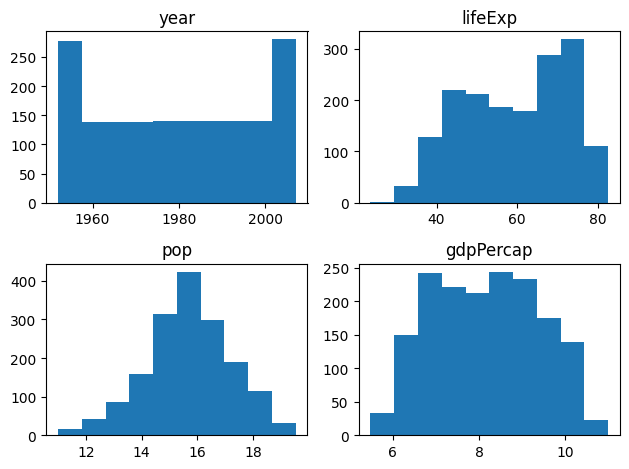

In [210]:
import matplotlib.pyplot as plt

###
plt.subplot(2,2,1)
plt.hist(encoded_data1['year'])
plt.title('year')

plt.subplot(2,2,2)
plt.hist(encoded_data1['lifeExp'])
plt.title('lifeExp')

plt.subplot(2,2,3)
plt.hist(encoded_data1['pop_log'])
plt.title('pop')

plt.subplot(2,2,4)
plt.hist(encoded_data1['gdpPercap_log'])
plt.title('gdpPercap')
###

plt.tight_layout()
plt.show()

In [211]:
# 데이터 추출
X_df1 = encoded_data1[['year'	,'lifeExp'	,'pop_log','continent_Africa',	'continent_Americas',	'continent_Asia',	'continent_Europe']]
y_df1 = encoded_data1[['gdpPercap_log']]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=0.2, random_state=42)

In [212]:
lgb_reg1 = LGBMRegressor()
lgb_reg1.fit(X_train,y_train)
y_pred = lgb_reg1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"{model.__class__.__name__} MSE: {mse}")

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 1340, number of used features: 7
[LightGBM] [Info] Start training from score 8.163483
LGBMRegressor MSE: 0.3289296276861451


2. 선형 회귀 모델을 이용하여 회귀분석을 진행하고, 그 의미에 대해서 직접 해석해보시오. (시도 시 10점)

In [213]:
for col in X_df1.columns.to_list():
    X_df1[col] = X_df1[col] - X_df1[col].mean()
print(X_df1.columns.to_list())

['year', 'lifeExp', 'pop_log', 'continent_Africa', 'continent_Americas', 'continent_Asia', 'continent_Europe']


/var/folders/cl/w3vvp74d6b95c0w799qxrb2w0000gn/T/ipykernel_15350/3647496722.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:
X_df1

,year,lifeExp,pop_log,continent_Africa,continent_Americas,continent_Asia,continent_Europe
0,-27.552239,-30.696687,0.239222,-0.372537,-0.179104,0.780896,-0.214925
1,-22.552239,-29.165687,0.331622,-0.372537,-0.179104,0.780896,-0.214925
2,-17.552239,-27.500687,0.436922,-0.372537,-0.179104,0.780896,-0.214925
3,-12.552239,-25.477687,0.553622,-0.372537,-0.179104,0.780896,-0.214925
4,-7.552239,-23.409687,0.679022,-0.372537,-0.179104,0.780896,-0.214925
...,...,...,...,...,...,...,...
1699,7.447761,2.853313,0.328966,0.627463,-0.179104,-0.219104,-0.214925
1700,12.447761,0.879313,0.478629,0.627463,-0.179104,-0.219104,-0.214925
1701,17.447761,-12.688687,0.542027,0.627463,-0.179104,-0.219104,-0.214925
1702,22.447761,-19.508687,0.586747,0.627463,-0.179104,-0.219104,-0.214925


In [215]:
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=0.2, random_state=0)

X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          gdpPercap_log   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     449.9
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:06:07   Log-Likelihood:                -1371.5
No. Observations:                1340   AIC:                             2759.
Df Residuals:                    1332   BIC:                             2801.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.1769      0

### 해석을 적는 란

해석: